# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# API key (Replace with your actual API key)
api_key = "8bc3cb858a9c4013b78392612fb2ff37"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units=metric&appid={api_key}"
    
    # Make API request
    city_weather = requests.get(city_url).json()

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Store the city weather data in a dictionary
        city_weather_data = {
            "City": city,
            "Latitude": city_lat,
            "Longitude": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        }
        
        # Append the city information to city_data list
        city_data.append(city_weather_data)

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | 0
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [26]:
# Convert the cities weather data list into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [27]:
# Display sample data
city_data_df.head()

""


In [28]:
# Export the City_Data into a csv
cities.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,0
City_ID,
0,masindi port
1,madimba
2,adamstown
3,kapa'a
4,aasiaat


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["lat"], city_data_df["Max Temp"], marker="o", edgecolor='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

KeyError: 'lat'

#### Latitude Vs. Humidity

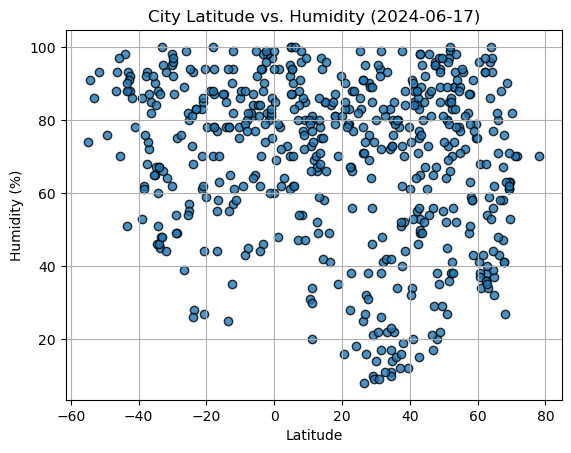

In [ ]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

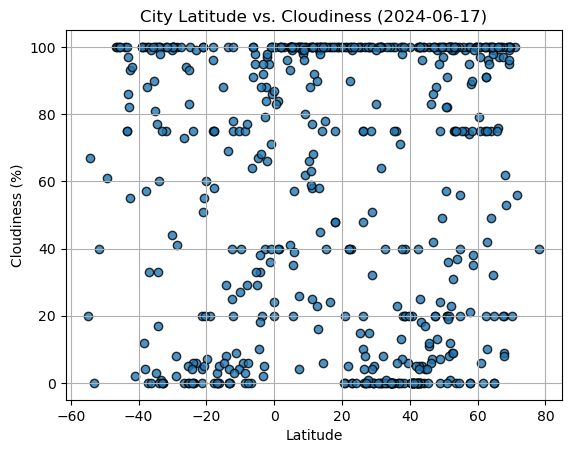

In [ ]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

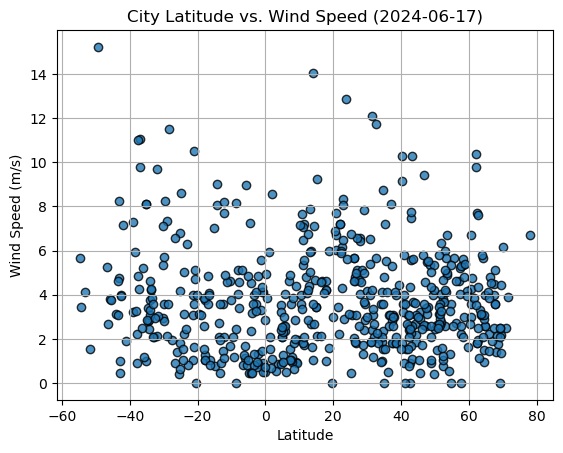

In [ ]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="red")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Linear Regression on the {title} vs. Latitude")
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

KeyError: 'Lat'

In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

KeyError: 'Lat'

###  Temperature vs. Latitude Linear Regression Plot

In [34]:
# Linear regression on Northern Hemisphere - Temperature vs. Latitude
print("A strong negative correlation is expected—higher latitudes tend to have lower temperatures.")
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature (°C)",
    "Northern Hemisphere: Temperature vs. Latitude"
)

A strong negative correlation is expected—higher latitudes tend to have lower temperatures.


NameError: name 'northern_hemi_df' is not defined

In [35]:
# Linear regression on Southern Hemisphere - Temperature vs. Latitude
print("A strong positive correlation is expected—lower latitudes tend to have higher temperatures.")
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature (°C)",
    "Southern Hemisphere: Temperature vs. Latitude"
)

A strong positive correlation is expected—lower latitudes tend to have higher temperatures.


NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [36]:
# Linear regression on Northern Hemisphere - Humidity vs. Latitude
print("The correlation between latitude and humidity in the Northern Hemisphere may be weak or inconsistent.")
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere: Humidity vs. Latitude"
)

The correlation between latitude and humidity in the Northern Hemisphere may be weak or inconsistent.


NameError: name 'northern_hemi_df' is not defined

In [37]:
# Linear regression on Southern Hemisphere - Humidity vs. Latitude
print("Humidity levels in the Southern Hemisphere may not have a strong correlation with latitude, as regional factors like ocean proximity and climate patterns play a significant role.")
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere: Humidity vs. Latitude"
)

Humidity levels in the Southern Hemisphere may not have a strong correlation with latitude, as regional factors like ocean proximity and climate patterns play a significant role.


NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [38]:
# Linear regression on Northern Hemisphere - Cloudiness vs. Latitude
print("Cloudiness in the Northern Hemisphere may not show a strong correlation with latitude, as cloud cover is influenced by regional climate conditions and seasonal variations.")
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Northern Hemisphere: Cloudiness vs. Latitude"
)

Cloudiness in the Northern Hemisphere may not show a strong correlation with latitude, as cloud cover is influenced by regional climate conditions and seasonal variations.


NameError: name 'northern_hemi_df' is not defined

In [39]:
# Linear regression on Southern Hemisphere - Cloudiness vs. Latitude
print("Cloudiness in the Southern Hemisphere may not show a strong correlation with latitude, as cloud cover is influenced by local weather patterns and atmospheric conditions.")
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Southern Hemisphere: Cloudiness vs. Latitude"
)

Cloudiness in the Southern Hemisphere may not show a strong correlation with latitude, as cloud cover is influenced by local weather patterns and atmospheric conditions.


NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [40]:
# Linear regression on Northern Hemisphere - Wind Speed vs. Latitude
print("Wind speed in the Northern Hemisphere may not show a strong correlation with latitude, as wind patterns are influenced by geographic features and atmospheric conditions.")
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "Northern Hemisphere: Wind Speed vs. Latitude"
)

Wind speed in the Northern Hemisphere may not show a strong correlation with latitude, as wind patterns are influenced by geographic features and atmospheric conditions.


NameError: name 'northern_hemi_df' is not defined

In [41]:
# Linear regression on Southern Hemisphere - Wind Speed vs. Latitude
print("Wind speed in the Southern Hemisphere may not show a strong correlation with latitude, as wind patterns are influenced by geographic features and atmospheric conditions.")
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "Southern Hemisphere: Wind Speed vs. Latitude"
)

Wind speed in the Southern Hemisphere may not show a strong correlation with latitude, as wind patterns are influenced by geographic features and atmospheric conditions.


NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE